#### 가정) 아침 미세먼지에 영향받는 실질적인 유동인구 연령을 구할 수 있을 것이다

In [3]:
import seaborn as sns    
%matplotlib inline  
from matplotlib import font_manager, rc
import pandas as pd

In [4]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [47]:
#데이터 불러옴
flow_data = pd.read_pickle('../../data/local_data/pkls/fppkl/sex_age_move.pkl')
dust_data = pd.read_pickle('../../data/local_data/pkls/dustpkl/gutotal_365_morning.pickle')

In [48]:
flow_data.columns

Index(['STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM', 'MAN_FLOW_POP_CNT_00',
       'MAN_FLOW_POP_CNT_10', 'MAN_FLOW_POP_CNT_20', 'MAN_FLOW_POP_CNT_30',
       'MAN_FLOW_POP_CNT_40', 'MAN_FLOW_POP_CNT_50', 'MAN_FLOW_POP_CNT_60',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_00', 'WMAN_FLOW_POP_CNT_10',
       'WMAN_FLOW_POP_CNT_20', 'WMAN_FLOW_POP_CNT_30', 'WMAN_FLOW_POP_CNT_40',
       'WMAN_FLOW_POP_CNT_50', 'WMAN_FLOW_POP_CNT_60', 'WMAN_FLOW_POP_CNT_70U',
       'SUM', 'MEAN'],
      dtype='object')

In [49]:
# flot_data.columns=['STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM', 'FLOW_POP_CON_00',
#        'FLOW_POP_CON_10', 'FLOW_POP_CON_20', 'FLOW_POP_CON_30',
#        'FLOW_POP_CON_40', 'FLOW_POP_CON_50', 'FLOW_POP_CON_60',
#        'FLOW_POP_CON_70', 'SUM', 'MEAN', 'SUM-WORKER']
del flow_data['STD_YM']
del flow_data['HDONG_CD']
# del flow_data['STD_YMD']
# del flow_data['HDONG_NM']
flow_data.columns

Index(['STD_YMD', 'HDONG_NM', 'MAN_FLOW_POP_CNT_00', 'MAN_FLOW_POP_CNT_10',
       'MAN_FLOW_POP_CNT_20', 'MAN_FLOW_POP_CNT_30', 'MAN_FLOW_POP_CNT_40',
       'MAN_FLOW_POP_CNT_50', 'MAN_FLOW_POP_CNT_60', 'MAN_FLOW_POP_CNT_70U',
       'WMAN_FLOW_POP_CNT_00', 'WMAN_FLOW_POP_CNT_10', 'WMAN_FLOW_POP_CNT_20',
       'WMAN_FLOW_POP_CNT_30', 'WMAN_FLOW_POP_CNT_40', 'WMAN_FLOW_POP_CNT_50',
       'WMAN_FLOW_POP_CNT_60', 'WMAN_FLOW_POP_CNT_70U', 'SUM', 'MEAN'],
      dtype='object')

In [50]:
dust_data.dtypes
# dust_data['date'] = dust_data['date'].astype('float64')
dust_data.date=pd.to_datetime(dust_data.date,format='%Y%m%d')
#날짜별로 동 다 합쳐버리자

In [51]:
dust_data.date

1       2018-04-02
2       2018-04-03
3       2018-04-04
4       2018-04-05
5       2018-04-06
6       2018-04-07
7       2018-04-08
8       2018-04-09
9       2018-04-10
10      2018-04-11
11      2018-04-12
12      2018-04-13
13      2018-04-14
14      2018-04-15
15      2018-04-16
16      2018-04-17
17      2018-04-18
18      2018-04-19
19      2018-04-20
20      2018-04-21
21      2018-04-22
22      2018-04-23
23      2018-04-24
24      2018-04-25
25      2018-04-26
26      2018-04-27
27      2018-04-28
28      2018-04-29
29      2018-04-30
30      2018-05-01
           ...    
10189   2019-03-01
10190   2019-03-02
10191   2019-03-03
10192   2019-03-04
10193   2019-03-05
10194   2019-03-06
10195   2019-03-07
10196   2019-03-08
10197   2019-03-09
10198   2019-03-10
10199   2019-03-11
10200   2019-03-12
10201   2019-03-13
10202   2019-03-14
10203   2019-03-15
10204   2019-03-16
10205   2019-03-17
10206   2019-03-18
10207   2019-03-19
10208   2019-03-20
10209   2019-03-21
10210   2019

In [52]:
flow_data.STD_YMD=pd.to_datetime(flow_data.STD_YMD,format='%Y%m%d')

In [53]:
# flow_data['STD_YMD'] = pd.to_datetime(flow_data['STD_YMD'], format='%Y%m%d', errors='ignore')

In [54]:
dust_data.columns

Index(['행정동', 'date', 'pm10', 'pm10_class', 'msg', 'msg_yes', 'pm10_class5'], dtype='object')

In [59]:
dust_data.columns=['HDONG_NM', 'date', 'pm10', 'pm10_class','msg', 'msg_yes','pm25_class5']
# del dust_data ['HDONG_NM']
# del dust_data['date']

In [60]:
mean_flow_data=flow_data.groupby(['STD_YMD']).mean()
#del flow_data['HDONG_CD']
mean_flow_data

,MAN_FLOW_POP_CNT_00,MAN_FLOW_POP_CNT_10,MAN_FLOW_POP_CNT_20,MAN_FLOW_POP_CNT_30,MAN_FLOW_POP_CNT_40,MAN_FLOW_POP_CNT_50,MAN_FLOW_POP_CNT_60,MAN_FLOW_POP_CNT_70U,WMAN_FLOW_POP_CNT_00,WMAN_FLOW_POP_CNT_10,WMAN_FLOW_POP_CNT_20,WMAN_FLOW_POP_CNT_30,WMAN_FLOW_POP_CNT_40,WMAN_FLOW_POP_CNT_50,WMAN_FLOW_POP_CNT_60,WMAN_FLOW_POP_CNT_70U,SUM,MEAN
STD_YMD,,,,,,,,,,,,,,,,,,
2018-04-01,174.291667,2400.227500,6086.978889,7581.303056,8426.380833,9101.750278,7205.672778,2890.737500,218.320833,2551.076944,6041.282222,6048.689722,6718.609167,6371.373056,3943.604722,1731.054722,77491.353889,4843.209618
2018-04-02,91.201667,2443.301389,7810.137500,11202.551111,13242.339444,12584.204722,9428.763611,3970.788333,111.048889,2675.166667,9032.931944,8149.510000,8913.050556,7886.771389,4742.818611,2206.545833,104491.131667,6530.695729
2018-04-03,88.075000,2528.007500,7777.701667,11519.043333,13720.759444,13100.740278,9841.979722,4014.929167,106.158889,2754.990556,9316.021944,8606.766389,9485.776667,8305.778889,5024.347778,2276.240000,108467.317222,6779.207326
2018-04-04,98.485556,2706.432500,7667.122500,11556.675000,13531.580000,12844.228056,9524.062778,3833.286389,116.626944,2863.847222,9435.057222,8723.811667,9517.538333,8234.316944,4925.962500,2186.332222,107765.365833,6735.335365
2018-04-05,85.206389,2479.896944,7475.269444,11279.727222,13378.704722,12543.230833,9247.035278,3550.054722,107.664722,2757.405278,9021.633333,8416.586667,9127.011667,7766.706389,4499.708056,1951.679722,103687.521389,6480.470087
2018-04-06,102.590278,2779.531389,7671.061667,11224.712222,13109.802222,12503.627222,9275.123889,3788.208056,129.286389,2871.513889,8672.907778,8403.158333,9084.881389,7796.498611,4667.308889,2078.096667,104158.308889,6509.894306
2018-04-07,207.915000,2616.405556,7548.628333,10096.858611,11049.944444,11649.821389,9031.085556,3569.044167,262.592500,2924.502222,7854.788333,7892.696389,8554.660833,7684.913333,4656.718889,2014.176944,97614.752500,6100.922031
2018-04-08,170.550556,2188.407500,5794.476111,7358.427778,8159.290278,8814.923333,7095.000278,2853.644444,218.336111,2289.556111,5716.052500,5799.109167,6473.489722,6212.513611,3844.034444,1674.668889,74662.480833,4666.405052
2018-04-09,81.864444,2410.255278,7617.163889,11117.743333,13114.291667,12466.422222,9339.337500,3914.958889,114.645000,2586.460000,8903.860556,8175.007778,8868.162778,7811.299722,4771.497500,2178.836944,103471.807500,6466.987969


In [61]:
mean_dust_data=dust_data.groupby(['date']).mean()
mean_dust_data.reset_index(inplace=True)

In [62]:
mean_dust_data.dtypes

date           datetime64[ns]
pm10                  float64
pm25_class5           float64
dtype: object

In [63]:
flow_dust=pd.merge(mean_dust_data, mean_flow_data,left_on=(['date']),right_on=(['STD_YMD']))

In [64]:
flow_dust

,date,pm10,pm25_class5,MAN_FLOW_POP_CNT_00,MAN_FLOW_POP_CNT_10,MAN_FLOW_POP_CNT_20,MAN_FLOW_POP_CNT_30,MAN_FLOW_POP_CNT_40,MAN_FLOW_POP_CNT_50,MAN_FLOW_POP_CNT_60,...,WMAN_FLOW_POP_CNT_00,WMAN_FLOW_POP_CNT_10,WMAN_FLOW_POP_CNT_20,WMAN_FLOW_POP_CNT_30,WMAN_FLOW_POP_CNT_40,WMAN_FLOW_POP_CNT_50,WMAN_FLOW_POP_CNT_60,WMAN_FLOW_POP_CNT_70U,SUM,MEAN
0,2018-04-01,68.707692,1.346154,174.291667,2400.227500,6086.978889,7581.303056,8426.380833,9101.750278,7205.672778,...,218.320833,2551.076944,6041.282222,6048.689722,6718.609167,6371.373056,3943.604722,1731.054722,77491.353889,4843.209618
1,2018-04-02,68.300000,1.357143,91.201667,2443.301389,7810.137500,11202.551111,13242.339444,12584.204722,9428.763611,...,111.048889,2675.166667,9032.931944,8149.510000,8913.050556,7886.771389,4742.818611,2206.545833,104491.131667,6530.695729
2,2018-04-03,55.596429,0.964286,88.075000,2528.007500,7777.701667,11519.043333,13720.759444,13100.740278,9841.979722,...,106.158889,2754.990556,9316.021944,8606.766389,9485.776667,8305.778889,5024.347778,2276.240000,108467.317222,6779.207326
3,2018-04-04,11.485714,0.000000,98.485556,2706.432500,7667.122500,11556.675000,13531.580000,12844.228056,9524.062778,...,116.626944,2863.847222,9435.057222,8723.811667,9517.538333,8234.316944,4925.962500,2186.332222,107765.365833,6735.335365
4,2018-04-05,15.835714,0.035714,85.206389,2479.896944,7475.269444,11279.727222,13378.704722,12543.230833,9247.035278,...,107.664722,2757.405278,9021.633333,8416.586667,9127.011667,7766.706389,4499.708056,1951.679722,103687.521389,6480.470087
5,2018-04-06,22.810714,0.107143,102.590278,2779.531389,7671.061667,11224.712222,13109.802222,12503.627222,9275.123889,...,129.286389,2871.513889,8672.907778,8403.158333,9084.881389,7796.498611,4667.308889,2078.096667,104158.308889,6509.894306
6,2018-04-07,66.046429,1.285714,207.915000,2616.405556,7548.628333,10096.858611,11049.944444,11649.821389,9031.085556,...,262.592500,2924.502222,7854.788333,7892.696389,8554.660833,7684.913333,4656.718889,2014.176944,97614.752500,6100.922031
7,2018-04-08,40.003571,0.250000,170.550556,2188.407500,5794.476111,7358.427778,8159.290278,8814.923333,7095.000278,...,218.336111,2289.556111,5716.052500,5799.109167,6473.489722,6212.513611,3844.034444,1674.668889,74662.480833,4666.405052
8,2018-04-09,58.928571,1.071429,81.864444,2410.255278,7617.163889,11117.743333,13114.291667,12466.422222,9339.337500,...,114.645000,2586.460000,8903.860556,8175.007778,8868.162778,7811.299722,4771.497500,2178.836944,103471.807500,6466.987969
9,2018-04-10,45.975000,0.321429,89.158333,2477.498333,7699.267500,11482.762222,13610.718611,13068.544722,9797.307500,...,118.602500,2689.468611,9257.380556,8640.639444,9498.960278,8268.572222,5053.368056,2335.177222,108181.996667,6761.374792


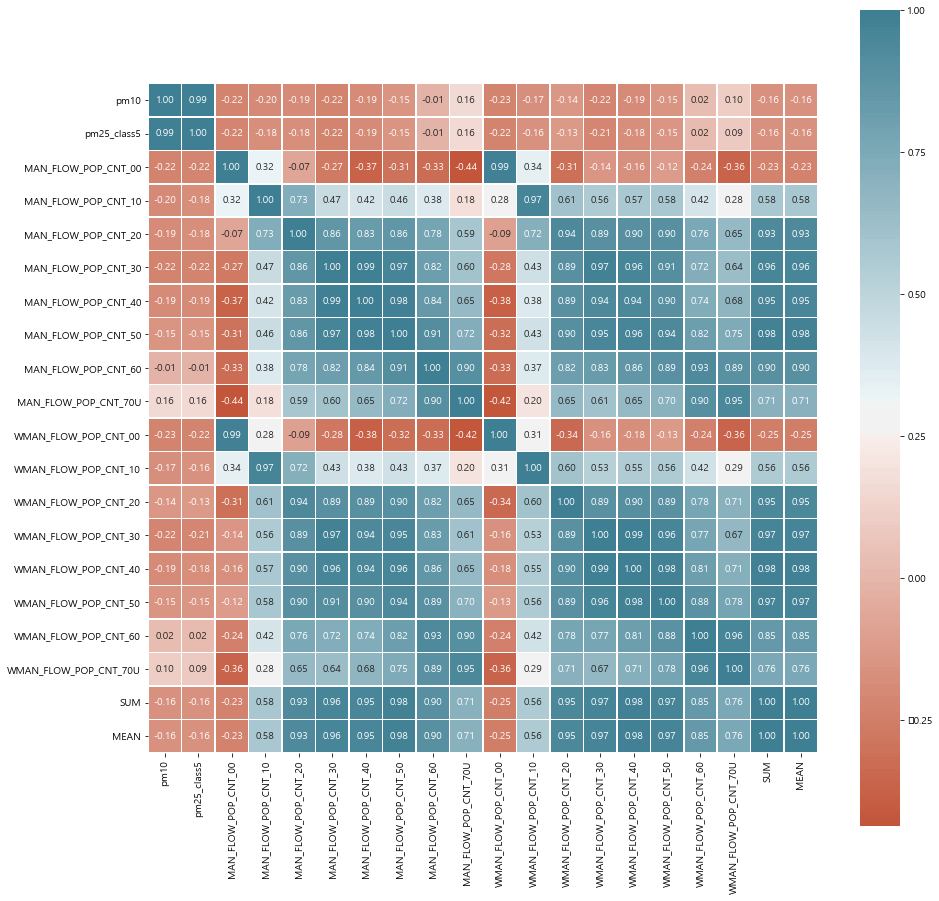

In [65]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,15))
sns.heatmap(data = flow_dust.corr(method = 'spearman'), annot=True, 
fmt = '.2f', linewidths=.5, cmap=sns.diverging_palette(20, 220, n=200),square=True)

#### 1. 전반적으로 미세먼지의 나이대별 유동인구의 상관도는 낮은 음의 상관관계를 보인다.
#### 2. 0~10대의 낮은 연령대는 미세먼지에 상대적으로 높은 음의 상관관계로 보인다.
#### 3. 70세 이상의 연령대는 미세하지만 양의 상관관계를 보이는 특이한 현상이 관측된다.

#### 노인인구여도 여성이 남성보다 미세먼지에 신경 쓴다